In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
water_dataframe = pd.read_csv('water_potability.csv')

In [ ]:
water_dataframe.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
water_dataframe.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


### Data Preparation

In [5]:
missing_percent = pd.DataFrame(water_dataframe.isnull().sum() / len(water_dataframe)* 100)

In [6]:
missing_percent

,0
ph,14.987790
Hardness,0.000000
Solids,0.000000
Chloramines,0.000000
Sulfate,23.840049
Conductivity,0.000000
Organic_carbon,0.000000
Trihalomethanes,4.945055
Turbidity,0.000000
Potability,0.000000


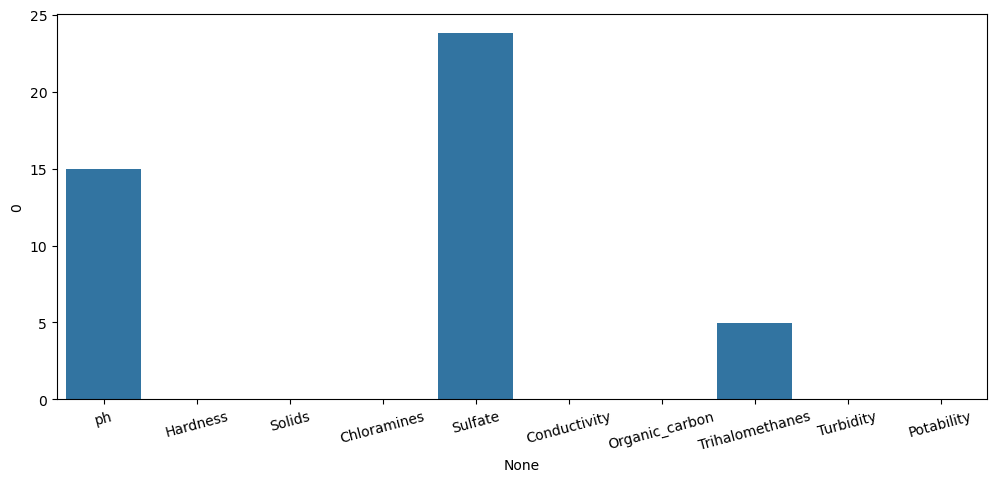

In [7]:

plt.figure(figsize=(12, 5))
sns.barplot(x = missing_percent.index, y = missing_percent[0])
plt.xticks(rotation = 15)
plt.show()

- By this we can understand features like `ph`, `sulfate` and `trihalomethanes` are contributing more in null value race
- So let's try to handle missing values

In [4]:
# Filling null values with mean
water_dataframe.fillna(water_dataframe.mean(), axis = 0, inplace=True)

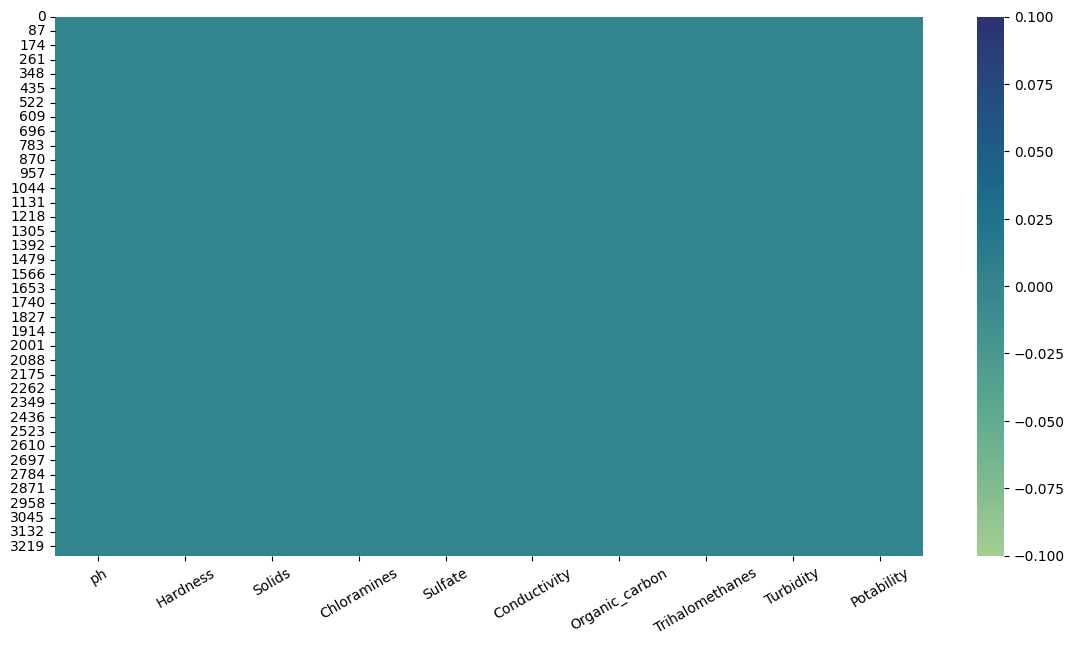

In [5]:
# Presence of null values
plt.figure(figsize=(14, 7))
sns.heatmap(water_dataframe.isnull(), cmap = 'crest')
plt.xticks(rotation = 30)
plt.show()

- Well all null values are flew away

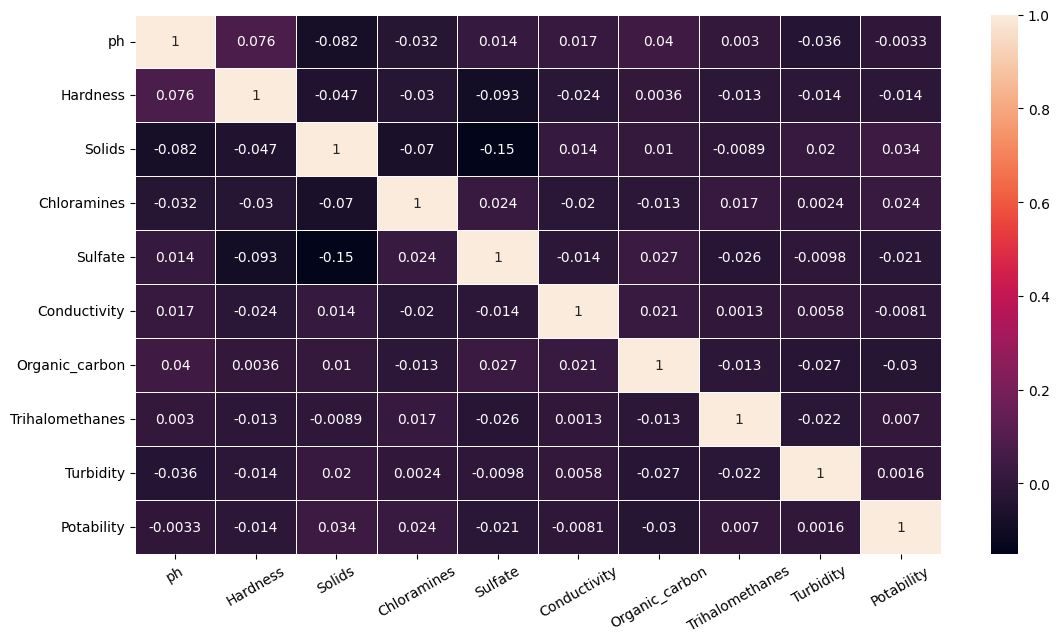

In [6]:
# Finding correlation b/w features
plt.figure(figsize=(13, 7))
sns.heatmap(water_dataframe.corr(), annot = True, linewidths = 0.5)
plt.xticks(rotation = 30)
plt.show()

*There is no correlation b\w any feature*
- So we won't drop any feature

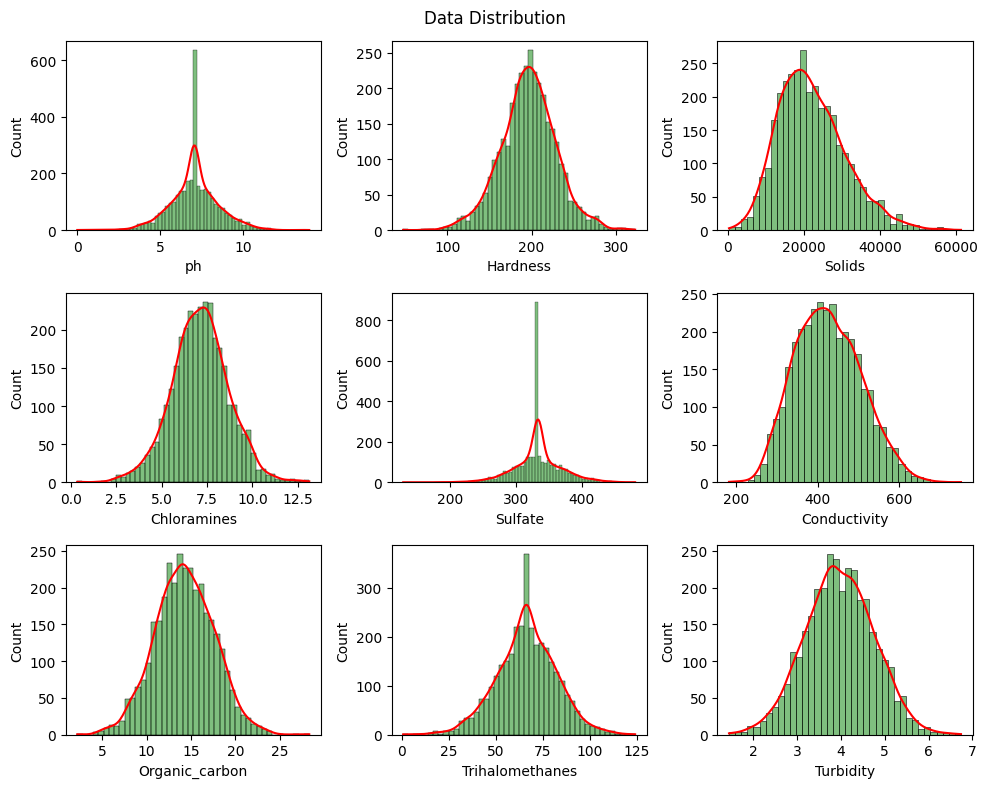

In [7]:
# Let's visualize how data is distributed

fig, axes = plt.subplots(3, 3, figsize=(10, 8))
axes = axes.flatten()

i = 0
for ax in axes:
    sns.histplot(data = water_dataframe, x = water_dataframe.columns[i],
                 kde=True, ax=ax, color = 'green')
    kde_line = ax.lines[-1]
    kde_line.set_color('red')
    i += 1

fig.suptitle('Data Distribution')
plt.tight_layout()
plt.show()

Well there is no skewness in features and data is in normal distribution mode

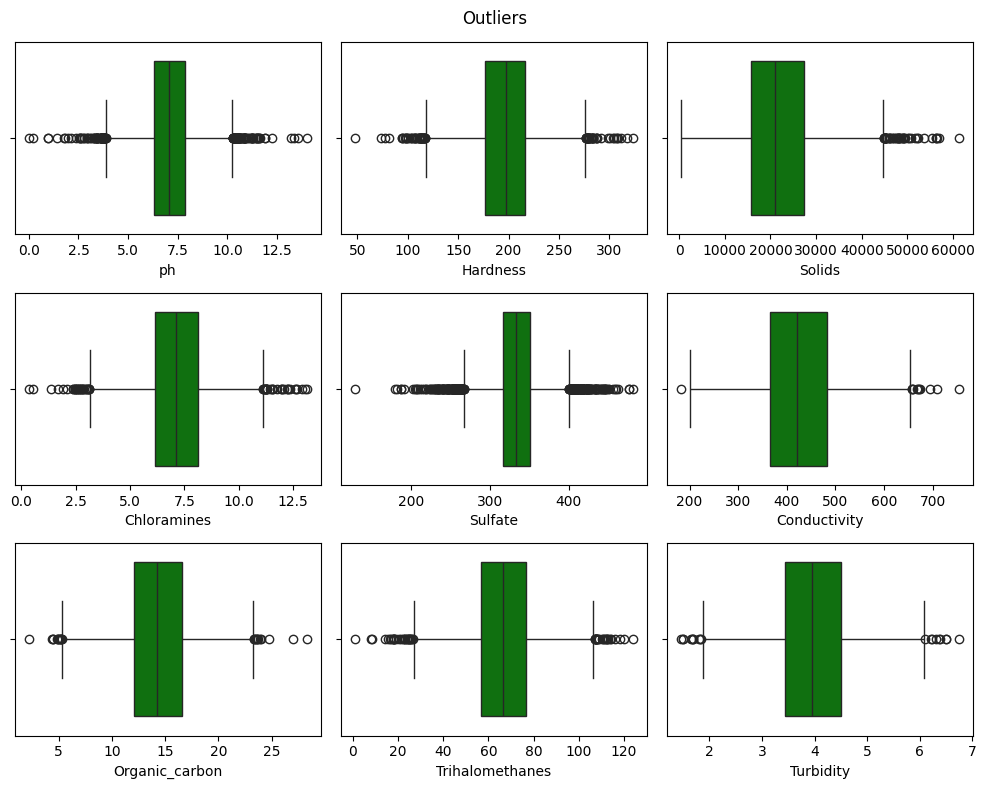

In [8]:
# Let's find any outliers in features
featues = water_dataframe.columns
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
axes = axes.flatten()

i = 0
for ax in axes:
    sns.boxplot(data = water_dataframe, x = featues[i],
                 ax=ax, color = 'green')
    i += 1

fig.suptitle('Outliers')
plt.tight_layout()
plt.show()

- There are so many outliers in every feature but these outlier values may effect water quality so we won't remove outliers

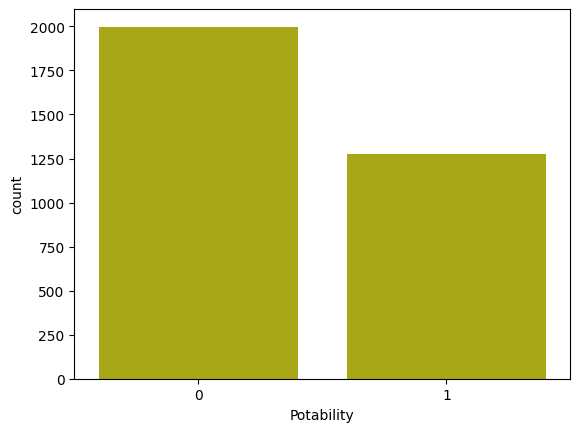

In [9]:
# Let's see total no.of potable and non-potable samples
sns.countplot(data = water_dataframe, x = 'Potability', color = 'y')
plt.show()

In [10]:
water_dataframe.Potability.value_counts() / len(water_dataframe) * 100

Potability
0    60.989011
1    39.010989
Name: count, dtype: float64

*Well it look's like data is slightly imbalanced in terms of patability*

In [40]:
# Let's partition the dataset into x, y
y = water_dataframe.Potability
x = water_dataframe.drop('Potability', axis = 1)

**Splitting data into train and test**

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [43]:
min_max_scalr = MinMaxScaler()
x = min_max_scalr.fit_transform(x)
x

array([[0.50577104, 0.57113901, 0.33609646, ..., 0.31340165, 0.69975313,
        0.28609102],
       [0.26543429, 0.29740043, 0.30061142, ..., 0.49731851, 0.4509993 ,
        0.57679264],
       [0.57850887, 0.64131081, 0.32161885, ..., 0.56201674, 0.5328657 ,
        0.30363656],
       ...,
       [0.67282217, 0.46548556, 0.53910122, ..., 0.33866167, 0.56065454,
        0.34956996],
       [0.36619735, 0.66440723, 0.19148981, ..., 0.34363779, 0.62265916,
        0.61611996],
       [0.56247653, 0.53563505, 0.28048408, ..., 0.5341137 , 0.63247754,
        0.16244074]])

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.25,
                                                    random_state = 1)

# Model Training

**Initiallly let's train without optimization and later with optimization**

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

*Logistic Regression*

In [46]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

for model_name, model in models.items():
    # Training Model
    model.fit(x_train, y_train)

    # Model Predictions
    y_train_prediction = model.predict(x_train)
    y_test_prediction = model.predict(x_test)

    # Trained model evaluation
    trained_confusion_matrix = pd.DataFrame(confusion_matrix(y_train, y_train_prediction), columns = y_train.unique())
    trained_f1_score = f1_score(y_train, y_train_prediction)
    trained_precision_score = precision_score(y_train, y_train_prediction, average = 'macro')
    trained_recall_score = recall_score(y_train, y_train_prediction)
    trained_accuracy_score = accuracy_score(y_train, y_train_prediction)

    # Testing model evaluation
    testing_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_test_prediction), columns = y_test.unique())
    testing_f1_score = f1_score(y_test, y_test_prediction)
    testing_precision_score = precision_score(y_test, y_test_prediction, average = 'macro')
    testing_recall_score = recall_score(y_test, y_test_prediction)
    testing_accuracy_score = accuracy_score(y_test, y_test_prediction)

    print(f'\nModel Name: {model_name}')
    print(f'Model Performance for Training Set')
    print(f'- F1 Score        : {trained_f1_score * 100:.2f}')
    print(f'- Precision Score : {trained_precision_score * 100:.2f}')
    print(f'- Recall Score    : {trained_recall_score * 100:.2f}')
    print(f'- Accuracy Score  : {trained_accuracy_score * 100:.2f}')
    print(f'- Confusion Matrix: \n{trained_confusion_matrix}')

    print('-' * 35)
    print(f'Model Performance for Testing Set')
    print(f'- F1 Score        : {testing_f1_score * 100:.2f}')
    print(f'- Precision Score : {testing_precision_score * 100:.2f}')
    print(f'- Recall Score    : {testing_recall_score * 100:.2f}')
    print(f'- Accuracy Score  : {testing_accuracy_score * 100:.2f}')
    print(f'- Confusion Matrix: \n{testing_confusion_matrix}')

    print('=' * 35)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Model Name: Logistic Regression
Model Performance for Training Set
- F1 Score        : 0.00
- Precision Score : 30.99
- Recall Score    : 0.00
- Accuracy Score  : 61.99
- Confusion Matrix: 
      0  1
0  1523  0
1   934  0
-----------------------------------
Model Performance for Testing Set
- F1 Score        : 0.00
- Precision Score : 29.00
- Recall Score    : 0.00
- Accuracy Score  : 58.00
- Confusion Matrix: 
     0  1
0  475  0
1  344  0

Model Name: Decision Tree
Model Performance for Training Set
- F1 Score        : 100.00
- Precision Score : 100.00
- Recall Score    : 100.00
- Accuracy Score  : 100.00
- Confusion Matrix: 
      0    1
0  1523    0
1     0  934
-----------------------------------
Model Performance for Testing Set
- F1 Score        : 51.27
- Precision Score : 59.03
- Recall Score    : 49.71
- Accuracy Score  : 60.32
- Confusion Matrix: 
     0    1
0  323  152
1  173  171

Model Name: Random Forest
Model Performance for Training Set
- F1 Score        : 100.00
- P

In [35]:
param_grid = {
	'n_estimators': [25, 50, 100, 150],
	'max_features': ['sqrt', 'log2', None],
	'max_depth': [3, 6, 9],
	'max_leaf_nodes': [3, 6, 9],
}


In [37]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)

grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9,
                       n_estimators=150)


In [38]:
rndm_frst_model = RandomForestClassifier(max_depth=9,
                       max_features=None,
                       max_leaf_nodes=9,
                       n_estimators=150)
rndm_frst_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9,
                       n_estimators=150)

In [39]:
# Model Predictions
y_train_prediction = rndm_frst_model.predict(x_train)
y_test_prediction = rndm_frst_model.predict(x_test)

# Trained model evaluation
trained_confusion_matrix = pd.DataFrame(confusion_matrix(y_train, y_train_prediction), columns = y_train.unique())
trained_f1_score = f1_score(y_train, y_train_prediction)
trained_precision_score = precision_score(y_train, y_train_prediction, average = 'macro')
trained_recall_score = recall_score(y_train, y_train_prediction)
trained_accuracy_score = accuracy_score(y_train, y_train_prediction)

# Testing model evaluation
testing_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_test_prediction), columns = y_test.unique())
testing_f1_score = f1_score(y_test, y_test_prediction)
testing_precision_score = precision_score(y_test, y_test_prediction, average = 'macro')
testing_recall_score = recall_score(y_test, y_test_prediction)
testing_accuracy_score = accuracy_score(y_test, y_test_prediction)


print(f'Model Performance for Training Set')
print(f'- F1 Score        : {trained_f1_score * 100:.2f}')
print(f'- Precision Score : {trained_precision_score * 100:.2f}')
print(f'- Recall Score    : {trained_recall_score * 100:.2f}')
print(f'- Accuracy Score  : {trained_accuracy_score * 100:.2f}')
print(f'- Confusion Matrix: \n{trained_confusion_matrix}')

print('-' * 35)
print(f'Model Performance for Testing Set')
print(f'- F1 Score        : {testing_f1_score * 100:.2f}')
print(f'- Precision Score : {testing_precision_score * 100:.2f}')
print(f'- Recall Score    : {testing_recall_score * 100:.2f}')
print(f'- Accuracy Score  : {testing_accuracy_score * 100:.2f}')
print(f'- Confusion Matrix: \n{testing_confusion_matrix}')

Model Performance for Training Set
- F1 Score        : 34.33
- Precision Score : 71.42
- Recall Score    : 22.16
- Accuracy Score  : 67.77
- Confusion Matrix: 
      0    1
0  1458   65
1   727  207
-----------------------------------
Model Performance for Testing Set
- F1 Score        : 26.17
- Precision Score : 63.74
- Recall Score    : 16.28
- Accuracy Score  : 61.42
- Confusion Matrix: 
     0   1
0  447  28
1  288  56


**I have tried feature engineering(StandardScalar, MinMaxScalar) and without feature engineering(bcz data is already normally distributed), tried out all above mentioned models, done Hyperparameter tuning i am able to achive Training precision score as `71.42` and Testing precision score as `63.74`. By adding some more data my future model may perform better than present model**